# Dataviz - Seaborn

Seaborn est une bibliothèque construite par dessus MatplotLib, afin d’étendre les possibilités en dataviz (type de visualisation, forme, etc.) et faciliter la réalisation de dataviz :
* facilite grandement les représentations multivariées (plusieurs variables) -> pour visualiser les relations au sein de datasets complexes
* la réalisation de subplots est facilité et même automatisée
* permet de réaliser en une ligne d’instruction des figures qui en demanderaient plusieurs avec matplotlib
* possède des méthodes pour calculer directement des statistiques et leur estimateurs, utiles pour l’exploration de données
* esthétique soignée par rapport à Matplotlib (passe mieux dans un rapport ou une diapo) 

Site officiel : [Seaborn](https://seaborn.pydata.org/)

Cheat sheet : https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

## Installation et import

In [ ]:
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

## Chargement des données et aperçu

Comme d’autres bibliothèques pour la data science, Seaborn inclut des jeux de données pour tester ou découvrir la bibliothèque. Dans ce notebook nous utiliserons les jeux de données 'tips' (les pourboires données dans un restaurant selon différentes circonstances : moment (déjeûner ou dîner, jour de la semaine, nombre de personnes à la table, montant de l’addition, etc.) et 'iris' (caractérisation d’iris de différentes espèces). Ces jeux de données se chargent avec la méthode ```sns.load_dataset()``` et retournent un dataframe.

In [4]:
tips_df = sns.load_dataset("tips")
# tips_df = pd.read_csv('Data/tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Exemple de dataviz

### Distributions : histogrammes (variables quantitatives)

Dans un premier temps jetons un œil à la distribution des notes et des pourboires

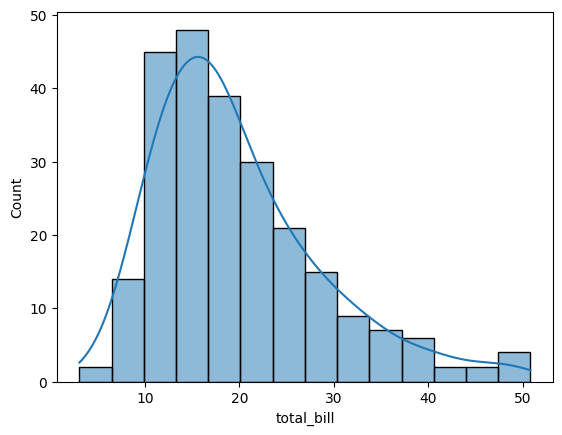

In [20]:
sns.histplot(tips_df['total_bill'], kde = True);

Le paramètre (booléen) ```kde```, pour *Kernel Distribution Estimation*, demande de tracer une estimation de la densité de probabilité de la variable par lissage par noyau.

On peut aussi mêler figures réalisées avec Matplotlib et avec Seaborn : ici pour comparer sur les pourboires :

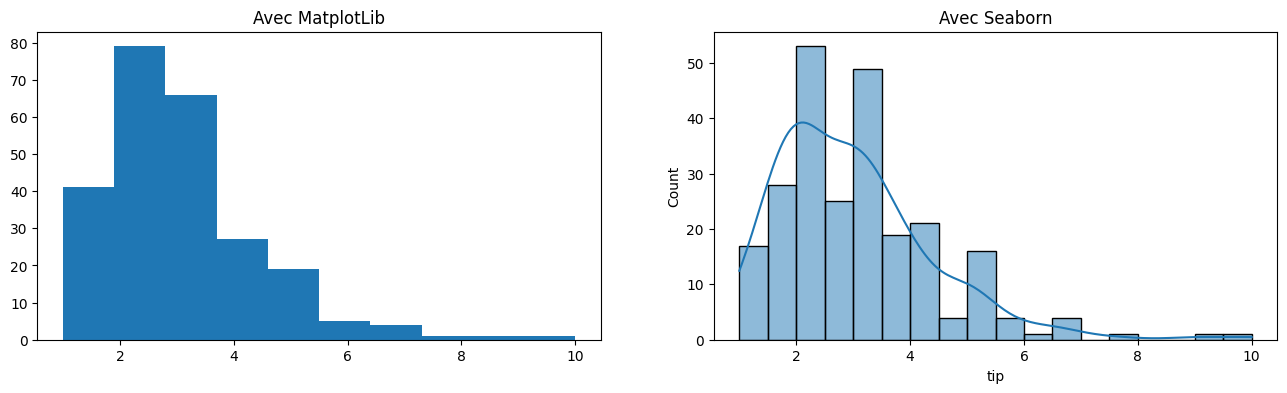

In [21]:
fig = plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.title('Avec MatplotLib')
plt.hist(tips_df['tip'])

plt.subplot(1, 2, 2)
plt.title('Avec Seaborn')
sns.histplot(tips_df['tip'], kde = True);

### Distributions : barplot/countplot (variables qualitatives)

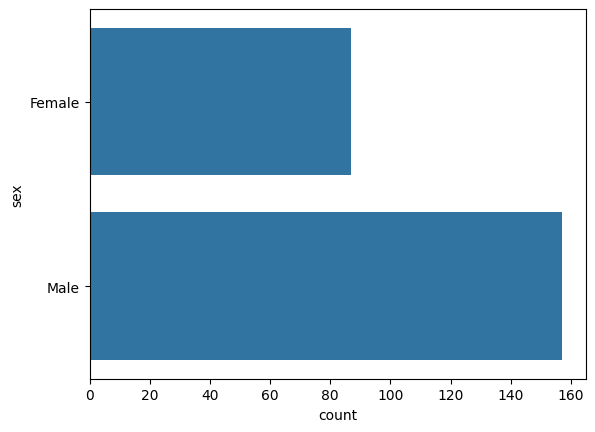

In [17]:
sns.countplot(tips_df['sex']);

Une manière « canonique » d’appeler les méthoodes pour créer des figures est de passer en argument de manière explicte les ```data``` sur lesquelles ont travaille (dataframe généralement) et quelles sont les colonnes que l’on veut représenter sur tel ou tel axe.

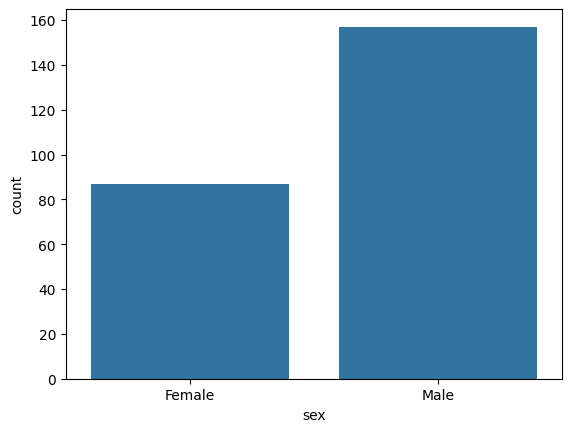

In [19]:
sns.countplot(x='sex', data=tips_df);

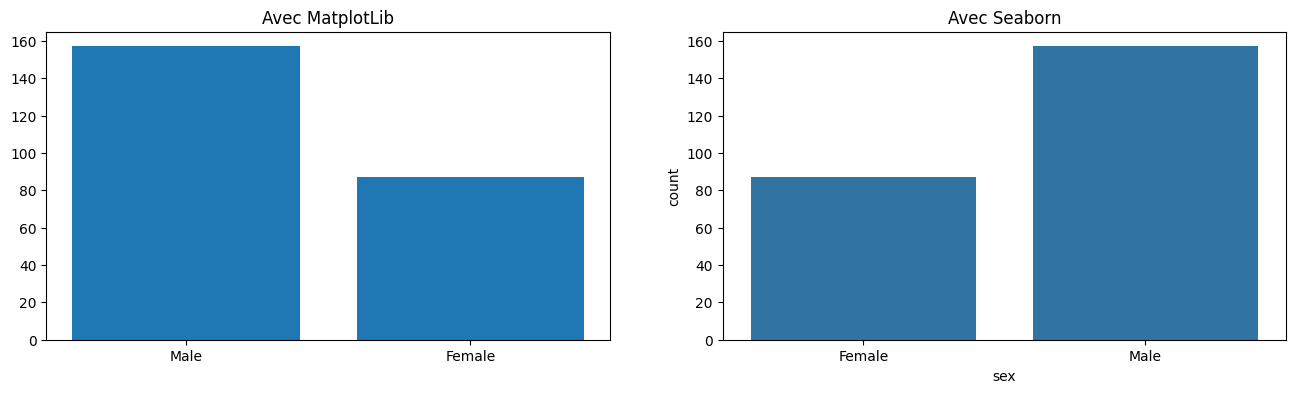

In [5]:
fig = plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.title('Avec MatplotLib')
sex_counts = tips_df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)

plt.subplot(1, 2, 2)
plt.title('Avec Seaborn')
sns.countplot(x='sex', data=tips_df);

On voit que Seaborn permet de générer des dataviz qui nous permettent d’explorer les données avec une écriture plus concise que Matplotlib.

### Relations : entre variables qualitatives

Imaginons que l’on souhaite voir la distribution de clients homme et femme selon les jours de la semaine (*data segregation*) :

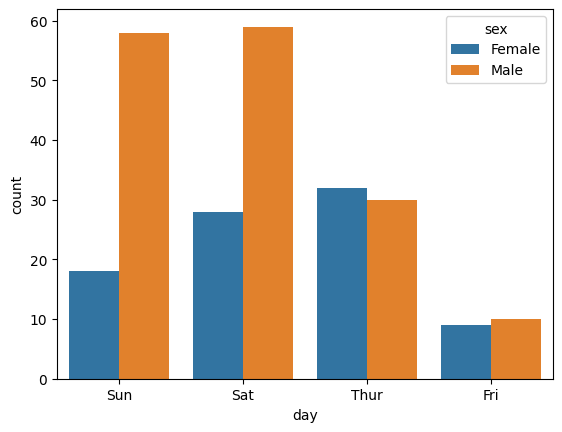

In [32]:
sns.countplot(x='day', data=tips_df, hue='sex');

### Relations : entre variables qualitatives et quantitatives

Nous allons chercher à voir comment se distribue une quantité (par exemple la note) en fonction d’une catégorie. Par exemple le moment du repas (déjeuner ou dîner). Pour ce faire, nous connaissons déjà le scatterplot :

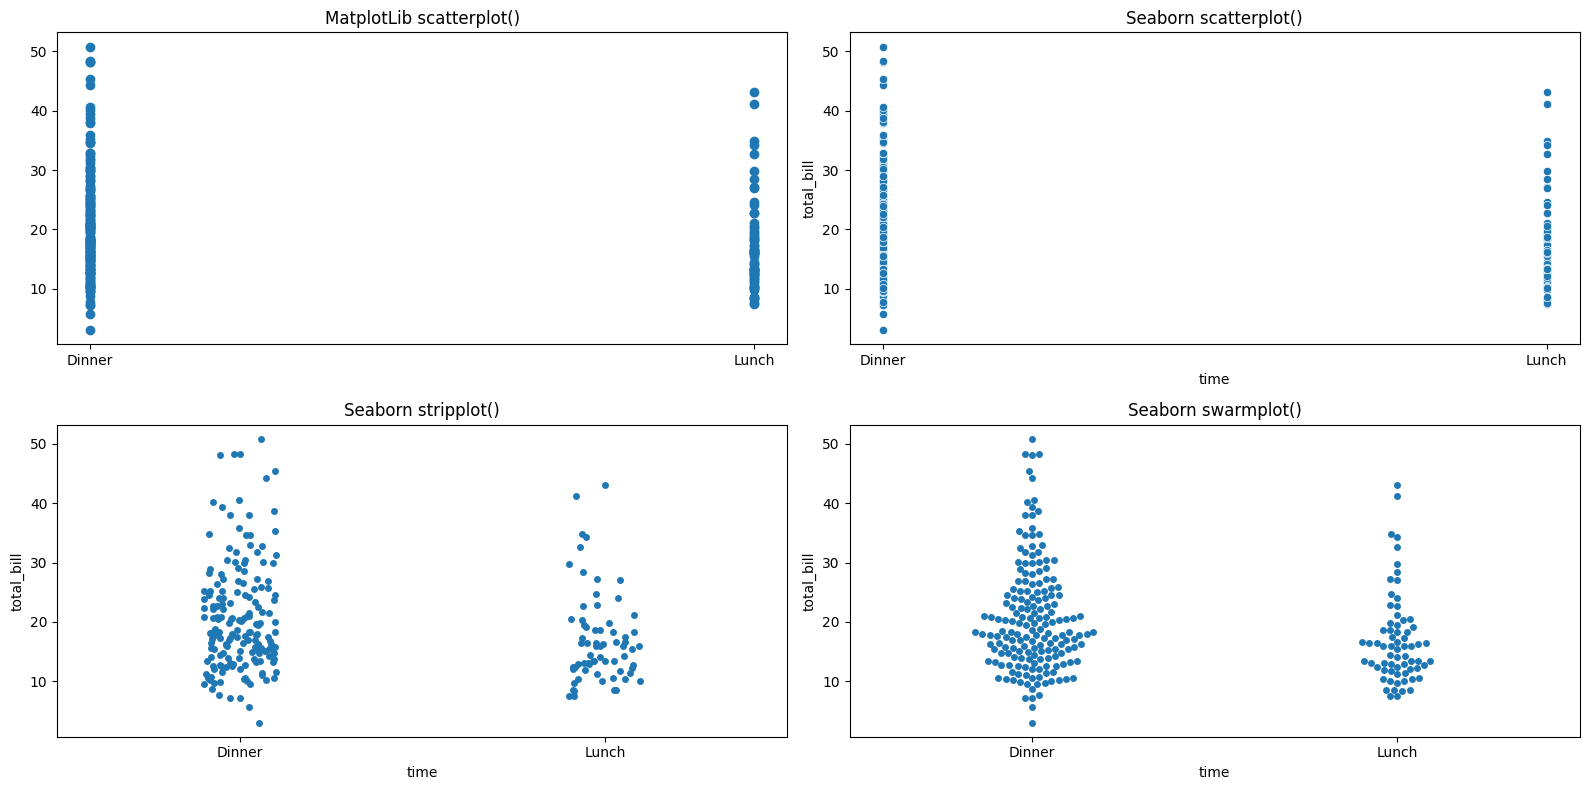

In [23]:
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('MatplotLib scatterplot()')
ax1.scatter(x=tips_df['time'], y=tips_df['total_bill'])

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Seaborn scatterplot()')
sns.scatterplot(x='time', y='total_bill', data=tips_df, ax=ax2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Seaborn stripplot()')
sns.stripplot(x='time', y='total_bill', data=tips_df, ax=ax3)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Seaborn swarmplot()')
sns.swarmplot(x='time', y='total_bill', data=tips_df, ax=ax4)
plt.tight_layout(); # permet de régler automatiquement l’espace entre les subplots

Le scatterplot nous permet d’avoir une idée de la dispersion des notes dans chaque catégorie. 
En réalité Seaborn propose plusieurs moyens de visualiser et de quantifier plus précisément les dispersions.

D’une part il y a plusieurs méthodes de base pour tracer des nuages de points :
* ```sns.scatterplot()``` le scatterplot « de base », plutôt destinés aux variables quantitatives
* ```sns.stripplot()``` pour représenter la dispersion d’une variable quantitative en fonction de catégories et en améliore donc la lisibilité
* ```sns.swarmplot()``` qui par rapport au stripplot prend le soin de faire en sorte que deux points ne se recouvrent pas

D’autre part Seaborn propose des méthodes plus ```sns.catplot()``` qui est une interface de haut-niveau pour toutes les méthodes de bases ci-dessus (et bien d’autres), qui agit au niveau des figures (et pas des axes, ce qui fait que ```catplot``` ne peut être utilisée pour un subplot).
On indique à ```catplot``` les différents types de représentation que l’on veut à l’aide des paramètres ```kind``` (```'swarm', 'box', 'violin'```, etc.), ```hue```, ```split```, ```jitter```… cf. ce [tutoriel](https://seaborn.pydata.org/tutorial/categorical.html) sur le site officiel.


#### Dispersion : catplot type boxplot

Ce type de visualisation permet de prendre précisément la mesure des différents quartiles : la boîte est centrée sur la médiane, les limites de la boîtes sont situés au 1er - 25% - et au 3e - 75% – quartiles, ce que l’on appelle l’IQR (*InterQuartile Range*).

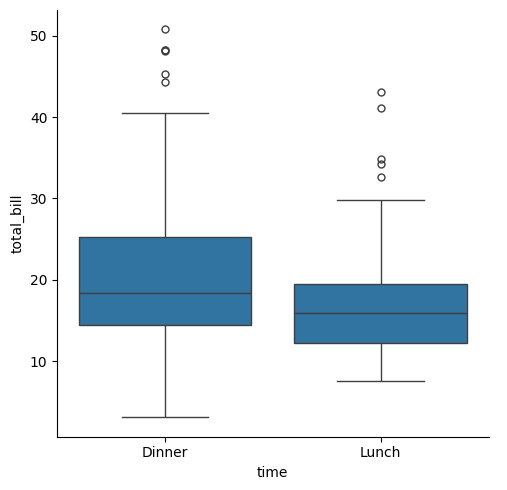

In [39]:
sns.catplot(x='time', y='total_bill', data=tips_df, kind='box');

On peut repérer en outre les *outliers* grâce aux « moustaches » dont les limites sont situées à Q1 - 1,5 * IQR, et Q3 * 1.5 * IQR

#### Dispersion : catplot type boxen

Le type ```boxen``` permet d’avoir une représentation plus précise de la distribution en rendant visible les quantiles, imapactant la lisibilité. Il y a toujours un arbitrage a réaliser entre la quantité d’information représentée et la facilité à les lire. Naturellement cette représentation fonctionne mieux lorsque les données sont nombreuses.

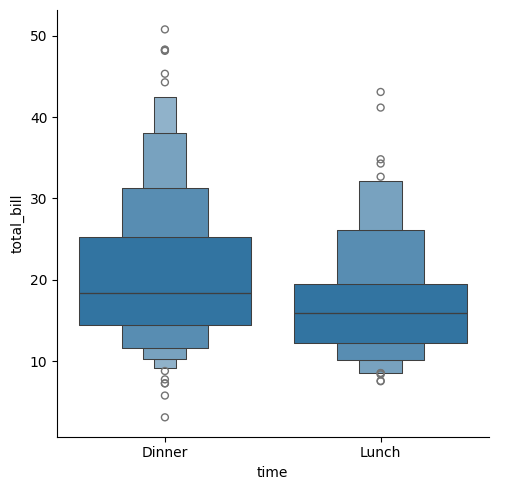

In [41]:
sns.catplot(x='time', y='total_bill', data=tips_df, kind='boxen');

### Dispersion : catplot type violin

Ce type laisse toute la place à la forme de la distribution des valeurs de la variable quantitative, à l’aide d’une kde et une boxplot en son centre (plus discrète)

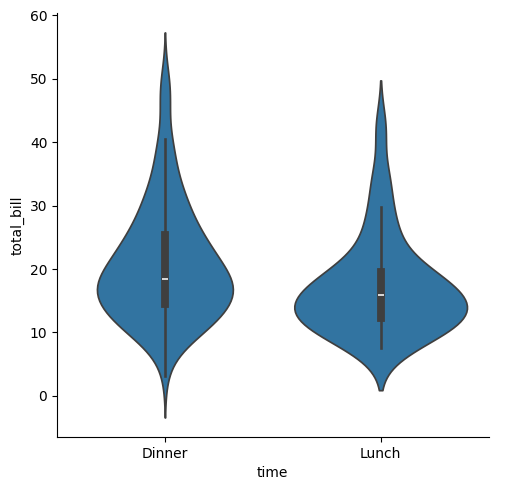

In [29]:
sns.catplot(x='time', y='total_bill', data=tips_df, kind='violin');

### Relations : entre variables quantitatives

Là encore, le scatterplot est la solution tout terrain :

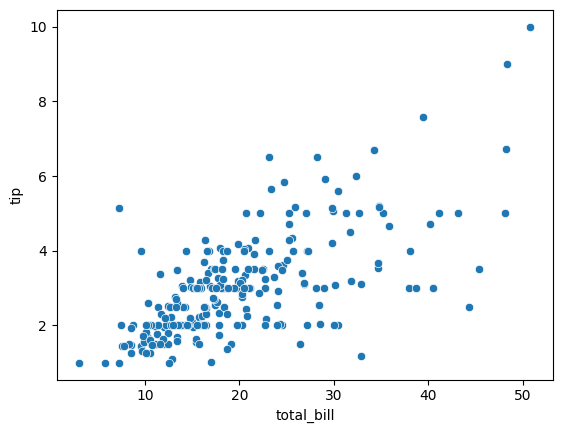

In [43]:
sns.scatterplot(x="total_bill", y="tip", data=tips_df);

On semble pouvoir distinguer un schéma (pattern) et un lien dans la dispersion des deux variables : il semble que les plus petites valeurs pour l’addition correspondent aussi aux plus petites valeurs de pourboire. Et les plus hauts pourboires s’observent pour les additions les plus élevées (quoi qu’à ce niveau on observe aussi des pourboires plus modestes). Caractériser cette tendance de manière chiffrée et déterminer si elle est « fiable » ou pas sera l’objet des cours suivant, sur l’analyse des données, avec des modèles statistiques comme la régression (relation linéaire entre les variables – équation de droite) et ce que l’on appelle l’inférence statistique ou le test d’hypothèse. Pour le moment nous allons nous en tenir à une perception intuitive de cette tendance, mais Seaborn peut nous fournir un outil pour mieux la saisir, surtout quand il y a beaucoup de dispersion ou quand cette dispersion n’est pas homogène : ```regplot()```

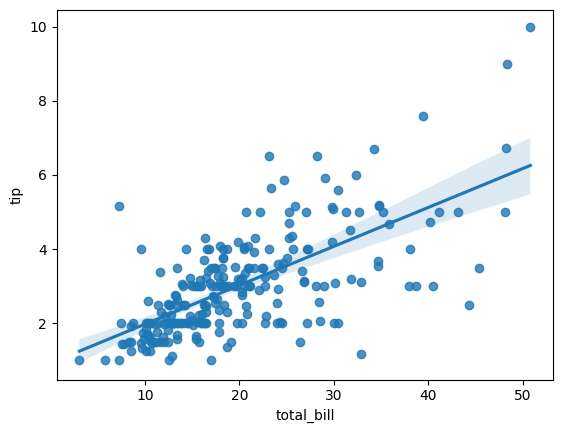

In [44]:
sns.regplot(x='total_bill', y='tip', data=tips_df);

Pour explorer la dispertion en gardant un œil sur les distributions, les ```jointplot()``` sont des outils très efficaces :

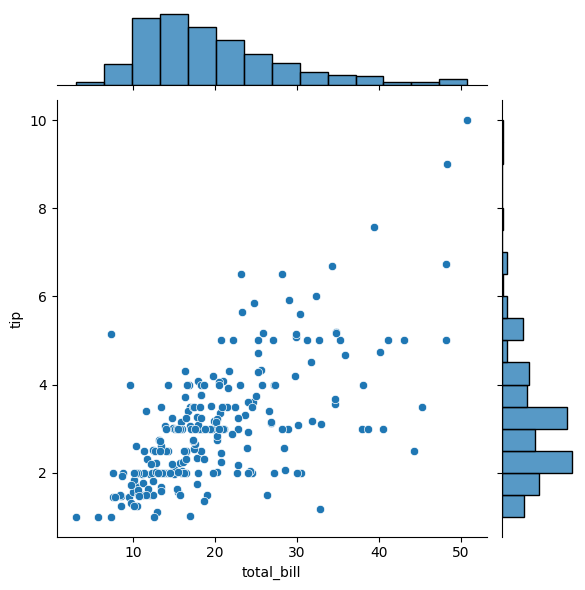

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips_df);

### Corrélations

In [5]:
numeric_df = tips_df.select_dtypes(include=[np.number])
numeric_df

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


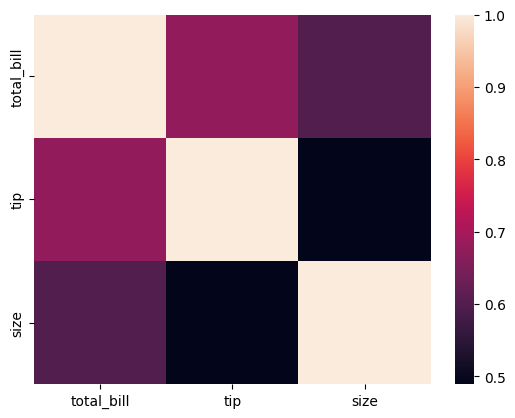

In [6]:
corr = numeric_df.corr()
sns.heatmap(corr);

### Relations : plusieurs variables quantitatives et qualitatives

Pour le momnet nous n’avons comparés que des variables deux à deux. Or nous aurons souvent de très nombreuses variables à considérer simultanément, et à explorer. C’est dans ce cas que la dataviz a tout son intérêt. Deux stratégies sont possibles :
* faire un graphique unique mais qui permet de différencier les différentes informations (forme, couleurs, taille…)
* faire des graphiques multiples, où généralement on décline les graphiques en fonction de catégories (p. ex. un graphique pour chaque jour)

Seaborn permet de créer rapidement l’un et l’autre.

#### Graphes complexes

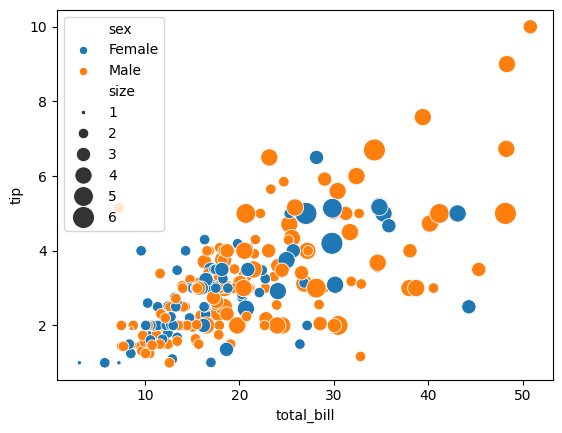

In [33]:
sns.scatterplot(x="total_bill", y="tip", hue='sex', size="size", sizes=(10, 250), data=tips_df);

## Graphes multiples 

### Facet grid

Seaborn facilite également énormément la génération de subplots, notamment pour faciliter la comparaison de l’évolution de la relation entre plusieurs variables, selon l’évolution d’une autre variable (catégorielle) : 

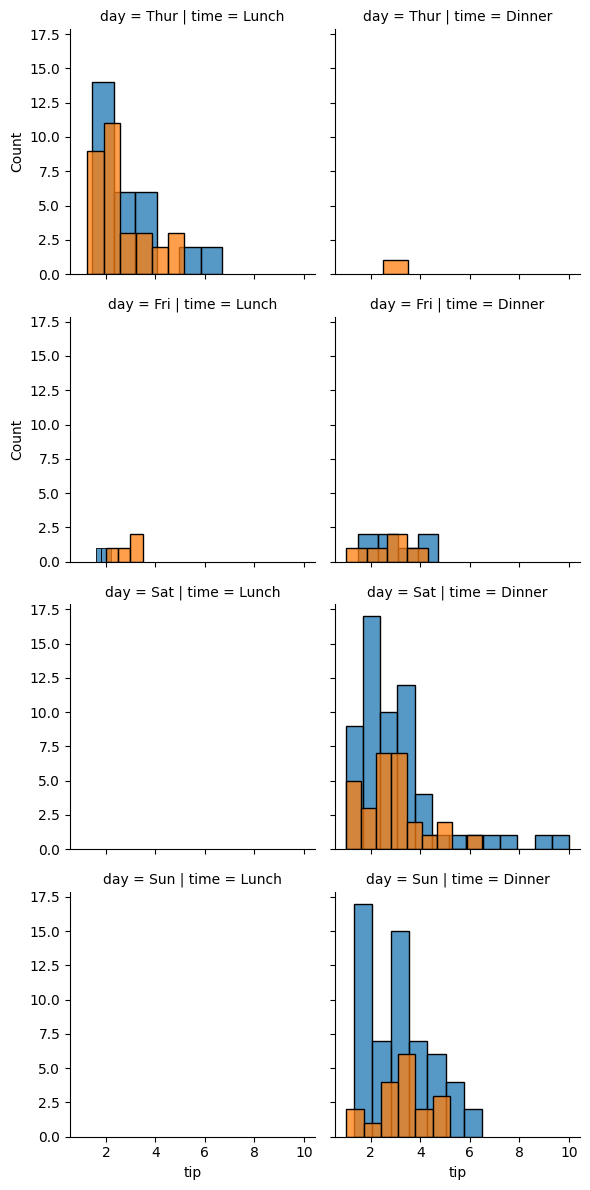

In [7]:
# Création de la grille
grid = sns.FacetGrid(tips_df, col="time", row="day", hue="sex") 

# On trace un graphe dans chaque « case » de la grille
grid.map(sns.histplot, "tip");



### Pair plot

Les pair plot sont un peu à la représentation graphique, ce que les tables de corrélations sont aux tableaux :

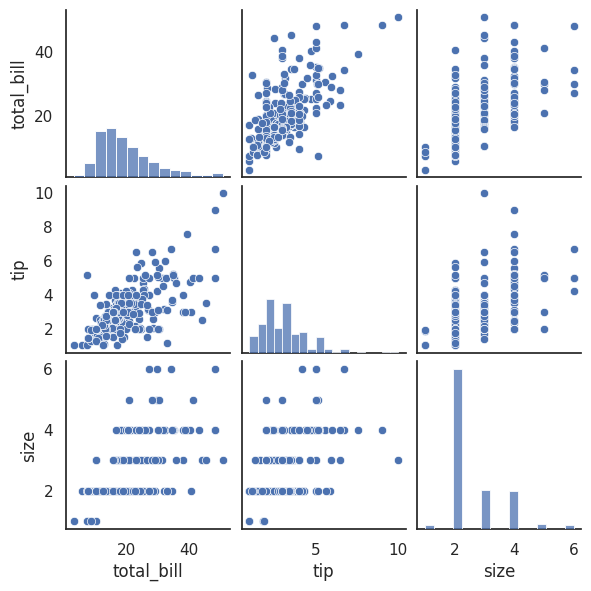

In [55]:
sns.set(style='white')
sns.pairplot(tips_df, height=2)
plt.show()

## Formatage des figures avec Seaborn

Seaborn fournit des styles prédéfinis pour les éléments d’un graphe :

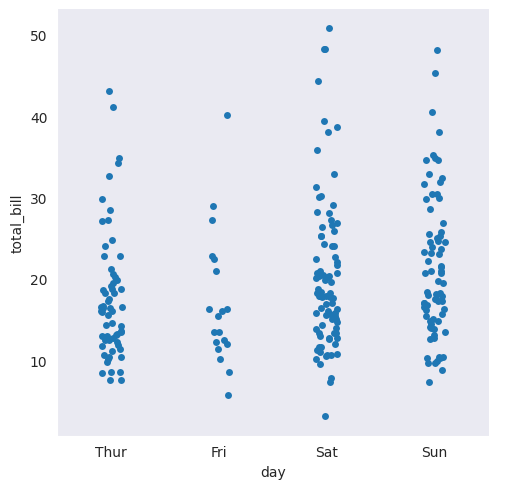

In [34]:
sns.set_style('dark') 
sns.catplot(x='day', y='total_bill', data=tips_df);


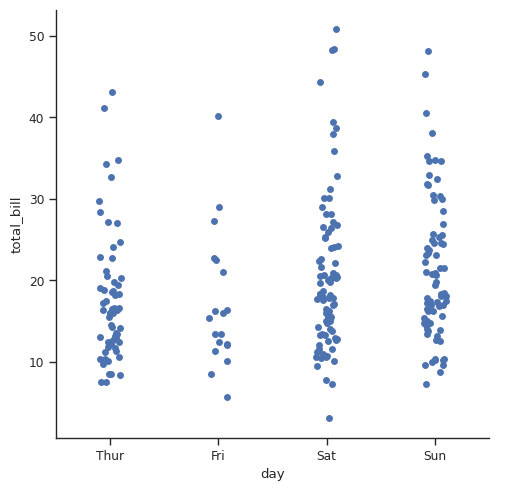

In [43]:
sns.set_style('ticks') 
sns.catplot(x='day', y='total_bill', data=tips_df);

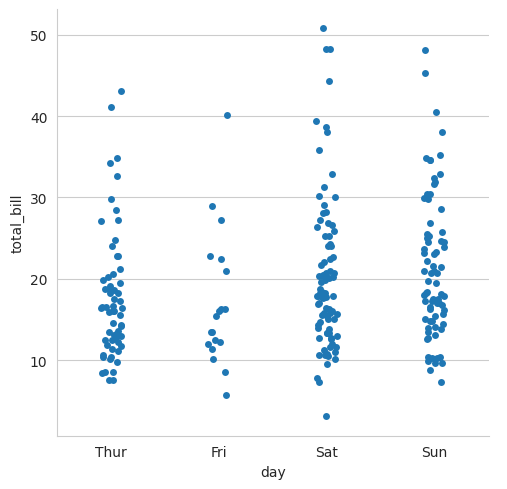

In [35]:

with sns.axes_style('whitegrid'): # on peut créer des contextes
    sns.catplot(x='day', y='total_bill', data=tips_df);

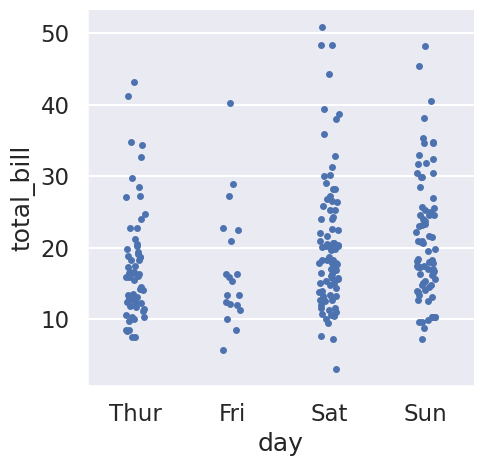

In [45]:
sns.set_theme() # pour remettre le theme par défaut
sns.set_context("talk") # context adapté à : paper, notebook, poster, talk
sns.catplot(x='day', y='total_bill', data=tips_df);

Plus d’exemples : 

https://seaborn.pydata.org/tutorial/aesthetics.htmlm

https://seaborn.pydata.org/tutorial/color_palettes.html

https://seaborn.pydata.org/tutorial/properties.html


### Palette

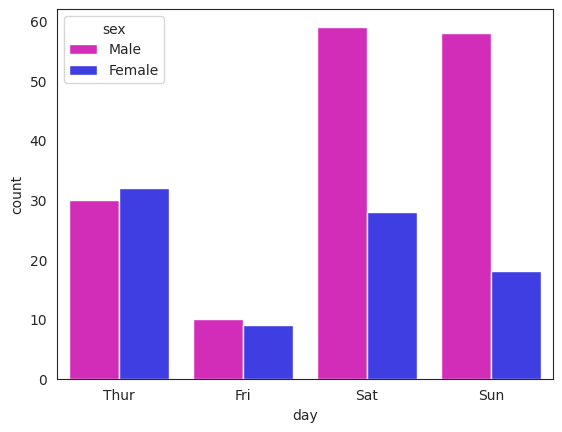

In [29]:
sns.set_style('white')
sns.countplot(x='day', data=tips_df, hue='sex', palette=sns.color_palette(["#ee11cc", "#2222FF"]));

## À vous de jouer : exercice

Chargez le dataset ```'iris'``` dans un dataframe ```iris_df``` et explorer visuellement ces données avec les techniques vues ci-dessus. Essayer d’en faire le maximum : c’est comme ça que vous vous familiariserez et apprendrez !